In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# import RMSE,MSE,MAPE lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../ETH-USD.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 54s 1s/step - loss: 0.0135 - val_loss: 0.0121
Epoch 2/100
21/21 [==============================] - 10s 488ms/step - loss: 0.0022 - val_loss: 0.0041
Epoch 3/100
21/21 [==============================] - 9s 425ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 4/100
21/21 [==============================] - 9s 420ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 5/100
21/21 [==============================] - 9s 436ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 6/100
21/21 [==============================] - 10s 455ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 7/100
21/21 [==============================] - 9s 444ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 8/100
21/21 [==============================] - 10s 488ms/step - loss: 0.0012 - val_loss: 0.0050
Epoch 9/100
21/21 [==============================] - 10s 462ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 10/100
21/21 [==============================] - 9s 427ms/step - loss: 0.0011 - val_

21/21 [==============================] - 12s 590ms/step - loss: 2.6375e-04 - val_loss: 8.7529e-04
Epoch 78/100
21/21 [==============================] - 13s 612ms/step - loss: 2.4557e-04 - val_loss: 9.9509e-04
Epoch 79/100
21/21 [==============================] - 13s 623ms/step - loss: 2.9179e-04 - val_loss: 0.0018
Epoch 80/100
21/21 [==============================] - 12s 587ms/step - loss: 3.2075e-04 - val_loss: 6.5285e-04
Epoch 81/100
21/21 [==============================] - 13s 605ms/step - loss: 2.5331e-04 - val_loss: 6.5279e-04
Epoch 82/100
21/21 [==============================] - 12s 579ms/step - loss: 2.5194e-04 - val_loss: 8.2173e-04
Epoch 83/100
21/21 [==============================] - 13s 613ms/step - loss: 2.7135e-04 - val_loss: 6.6585e-04
Epoch 84/100
21/21 [==============================] - 13s 614ms/step - loss: 2.4892e-04 - val_loss: 6.7339e-04
Epoch 85/100
21/21 [==============================] - 13s 621ms/step - loss: 2.4732e-04 - val_loss: 6.5315e-04
Epoch 86/100
21/21

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

4/4 [==============================] - 1s 76ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE on test set: {:.3f}".format(mape))
mape = mean_absolute_percentage_error(yval, y_pred_val)
print("MAPE on validation set: {:.3f}".format(mape))
evs = explained_variance_score(ytest, y_pred)
print("The explained variance score (EVS) on test set: {:.3f}".format(evs))
evs = explained_variance_score(yval, y_pred_val)
print("The explained variance score (EVS) on validate set: {:.3f}".format(evs))

RMSE on test set: 2133.860
RMSE on validation set: 1837.080
MAPE on test set: 4988.634
MAPE on validation set: 5013.766
The explained variance score (EVS) on test set: -20882814.929
The explained variance score (EVS) on validate set: -23302409.729


In [13]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30 and len(temp_input) >= n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.312541   0.30665137 0.28646695 0.28445698 0.29576433 0.31853956
 0.33757936 0.34248613 0.33247582 0.33692504 0.36130639 0.35478632
 0.35984512 0.34921534 0.36432591 0.34972208 0.36636586 0.35275263
 0.35100127 0.35775116 0.34501454 0.35713964 0.36141569 0.36135971
 0.36755393 0.36582765 0.36198811 0.36507391 0.37791462 0.38597525
 0.37832019 0.37677898 0.37336556 0.37545737 0.38641806 0.38239549
 0.38842209 0.4078715  0.42669659 0.42475726 0.43058221 0.42132565
 0.42731037 0.39174739 0.39316333 0.37347168 0.37859644 0.37602301
 0.37193979 0.37701537 0.37697529 0.38590595 0.38246383 0.38593358
 0.37916662 0.36965486 0.37786897 0.38503143 0.37933156 0.40415438
 0.38409441 0.37835273 0.37326922 0.37317624 0.3718645  0.36215362
 0.36459222 0.36207414 0.36300188 0.366608   0.36799798 0.36751957
 0.36326152 0.36555878 0.36722734 0.36385437 0.3666048  0.37439827
 0.36291706 0.36415522 0.36896423 0.36947792 0.38635601 0.38258341
 0.38426464 0.37857568 0.37605249 0.38558237 0.382

7 day output [[0.35956016]]
8 day input [0.33247582 0.33692504 0.36130639 0.35478632 0.35984512 0.34921534
 0.36432591 0.34972208 0.36636586 0.35275263 0.35100127 0.35775116
 0.34501454 0.35713964 0.36141569 0.36135971 0.36755393 0.36582765
 0.36198811 0.36507391 0.37791462 0.38597525 0.37832019 0.37677898
 0.37336556 0.37545737 0.38641806 0.38239549 0.38842209 0.4078715
 0.42669659 0.42475726 0.43058221 0.42132565 0.42731037 0.39174739
 0.39316333 0.37347168 0.37859644 0.37602301 0.37193979 0.37701537
 0.37697529 0.38590595 0.38246383 0.38593358 0.37916662 0.36965486
 0.37786897 0.38503143 0.37933156 0.40415438 0.38409441 0.37835273
 0.37326922 0.37317624 0.3718645  0.36215362 0.36459222 0.36207414
 0.36300188 0.366608   0.36799798 0.36751957 0.36326152 0.36555878
 0.36722734 0.36385437 0.3666048  0.37439827 0.36291706 0.36415522
 0.36896423 0.36947792 0.38635601 0.38258341 0.38426464 0.37857568
 0.37605249 0.38558237 0.38244261 0.38204096 0.3653978  0.38076791
 0.36974818 0.37268949 

15 day output [[0.36757153]]
16 day input [0.36636586 0.35275263 0.35100127 0.35775116 0.34501454 0.35713964
 0.36141569 0.36135971 0.36755393 0.36582765 0.36198811 0.36507391
 0.37791462 0.38597525 0.37832019 0.37677898 0.37336556 0.37545737
 0.38641806 0.38239549 0.38842209 0.4078715  0.42669659 0.42475726
 0.43058221 0.42132565 0.42731037 0.39174739 0.39316333 0.37347168
 0.37859644 0.37602301 0.37193979 0.37701537 0.37697529 0.38590595
 0.38246383 0.38593358 0.37916662 0.36965486 0.37786897 0.38503143
 0.37933156 0.40415438 0.38409441 0.37835273 0.37326922 0.37317624
 0.3718645  0.36215362 0.36459222 0.36207414 0.36300188 0.366608
 0.36799798 0.36751957 0.36326152 0.36555878 0.36722734 0.36385437
 0.3666048  0.37439827 0.36291706 0.36415522 0.36896423 0.36947792
 0.38635601 0.38258341 0.38426464 0.37857568 0.37605249 0.38558237
 0.38244261 0.38204096 0.3653978  0.38076791 0.36974818 0.37268949
 0.37140418 0.35282454 0.35304251 0.35073982 0.3500014  0.33127838
 0.34787512 0.34739998

23 day output [[0.37944698]]
24 day input [0.36755393 0.36582765 0.36198811 0.36507391 0.37791462 0.38597525
 0.37832019 0.37677898 0.37336556 0.37545737 0.38641806 0.38239549
 0.38842209 0.4078715  0.42669659 0.42475726 0.43058221 0.42132565
 0.42731037 0.39174739 0.39316333 0.37347168 0.37859644 0.37602301
 0.37193979 0.37701537 0.37697529 0.38590595 0.38246383 0.38593358
 0.37916662 0.36965486 0.37786897 0.38503143 0.37933156 0.40415438
 0.38409441 0.37835273 0.37326922 0.37317624 0.3718645  0.36215362
 0.36459222 0.36207414 0.36300188 0.366608   0.36799798 0.36751957
 0.36326152 0.36555878 0.36722734 0.36385437 0.3666048  0.37439827
 0.36291706 0.36415522 0.36896423 0.36947792 0.38635601 0.38258341
 0.38426464 0.37857568 0.37605249 0.38558237 0.38244261 0.38204096
 0.3653978  0.38076791 0.36974818 0.37268949 0.37140418 0.35282454
 0.35304251 0.35073982 0.3500014  0.33127838 0.34787512 0.34739998
 0.34954613 0.3520928  0.35442814 0.35643563 0.35812932 0.35956016
 0.36078846 0.361872

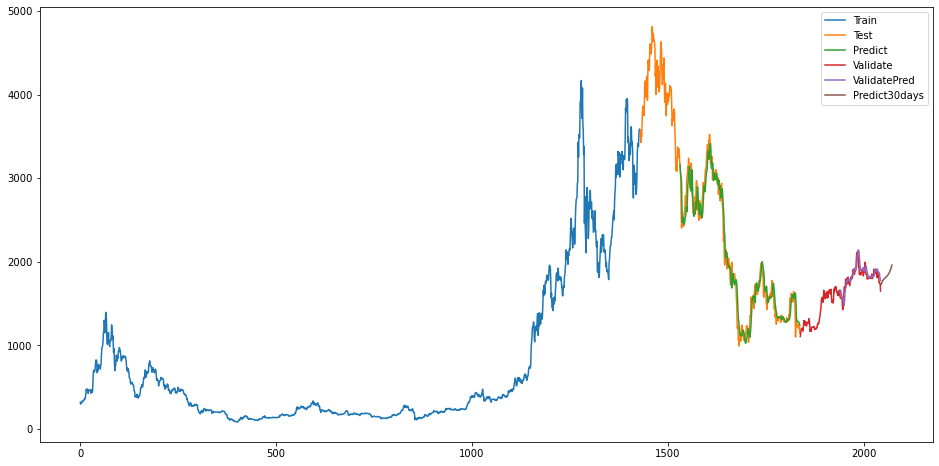

In [14]:
# 14.Vẽ hình
plt.subplots(figsize=(16, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()